# Inflation, unemployment and GDP

In this project we aim to examine the historical trends in inflation rates, unemployment and GDP in Denmark. 





Inflation is the rate at which the general prices for goods and services change increase, corresponding to a decrease in purchasing power of money. Gross Domestic Product (GDP) is a measure of a country's yearly production. We use this to assess the econimic well-being in Denmark in a given time-period.


Data is retrieved from Statitics Denmark. We utilize API's to retrieve data on inflation rates (PRIS111) and unemployment (AULP01). Data on GDP (NAN1) is retrieved from CSV file. Yearly inflation rates are set as end-of-year rates (M12).






In this project we examine the historical development of fertility, GDP and inflation.
Furthermore, we look at the correlation between these variables. Fertility rates are an important demographic mesaure, refecting patterns in family planning, societal norms, and government policies. GDP is an important economic statistic representing the overall economic health and productivity for a country, which in this project is Denmark. Inflation rates also hold information about the economic health as it influences the purchasing power of the people. We get our data from Statistikbanken, where we use tabel FERT1, NAN1 and PRIS112. We have recalculated PRIS112 to inflationrates in Excel before importing them.


Imports and load of relevant libraries

In [1]:
# Importing sets and magic
import pandas as pd
import matplotlib.pyplot as plt
from dstapi import DstApi

%load_ext autoreload
%autoreload 2
plt.rcParams.update({"axes.grid": True, "grid.color": "black", "grid.alpha": 0.25, "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Reading and cleaning data (inflation)

In [2]:
# Defining dictionary mappings for renaming and processing
columns_dict = {'VAREGR': 'variable', 'ENHED': 'unit', 'TID': 'Year', 'INDHOLD': 'Inflation rate'}
var_dict = {'00 Consumer price index, total': 'Y'}
unit_dict = {'Index': 'Indexnumber', 'Percentage change compared to previous month (per cent)': 'pct month', 'Percentage change compared to same month the Year before (per cent)': 'pct Year'}

# Retrieving and processing inflation data from Danmarks Statistik API
PRIS111_api = DstApi('PRIS111')
params = PRIS111_api._define_base_params(language='en')
PRIS111 = PRIS111_api.get_data(params)
PRIS111.rename(columns=columns_dict, inplace=True)
for key, value in var_dict.items():
    PRIS111['variable'].replace(key, value, inplace=True)
for key, value in unit_dict.items():
    PRIS111['unit'].replace(key, value, inplace=True)

# Converting our dataframes from string values to numeric values. Sorting Dataframe by year
PRIS111['Year'] = pd.to_numeric(PRIS111['Year'].str.replace('M12', ''), errors='coerce')
PRIS111['Inflation rate'] = pd.to_numeric(PRIS111['Inflation rate'], errors='coerce')
PRIS111 = PRIS111[(PRIS111['variable'] == 'Y') & (~PRIS111['unit'].isin(['Indexnumber', 'pct month'])) & (PRIS111['Year'].notna()) & (PRIS111['Year'] >= 2007) & (PRIS111['Year'] != 2023)]
PRIS111.sort_values(by='Year', inplace=True)


## Displaying data

In [3]:
PRIS111.head(5)

,variable,unit,Year,Inflation rate
111067,Y,Percentage change compared to same month the y...,2007.0,2.3
10738,Y,Percentage change compared to same month the y...,2008.0,2.4
15057,Y,Percentage change compared to same month the y...,2009.0,1.4
187928,Y,Percentage change compared to same month the y...,2010.0,2.8
128829,Y,Percentage change compared to same month the y...,2011.0,2.4


# Plotting data

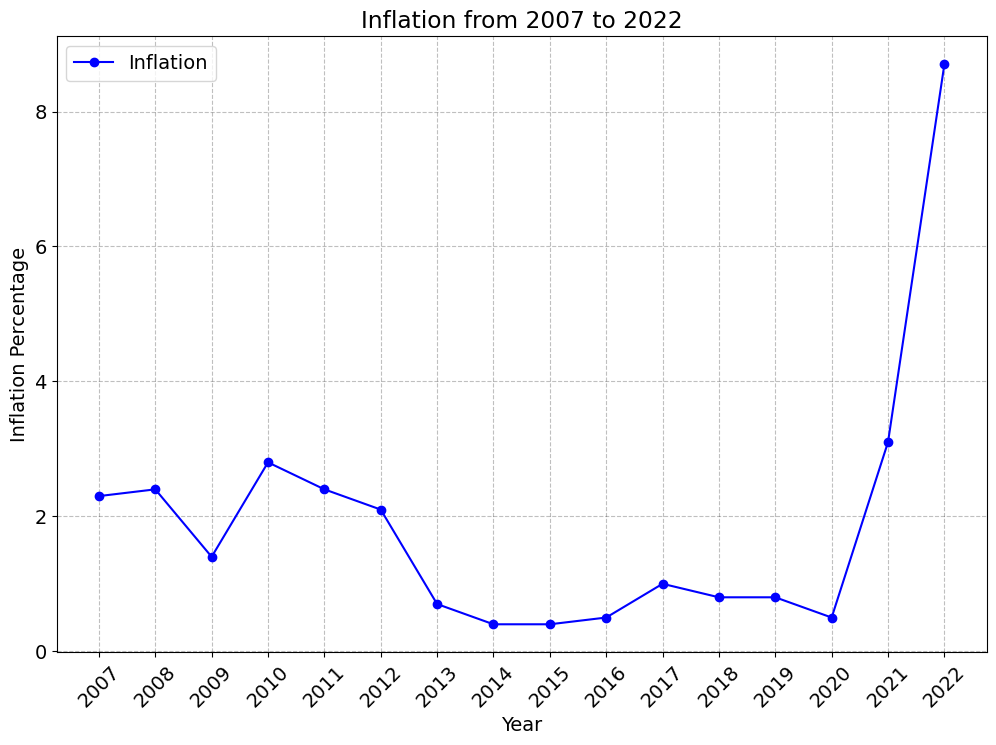

In [4]:
# Plotting inflation data
plt.figure(figsize=(12, 8))
plt.plot(PRIS111['Year'], PRIS111['Inflation rate'], marker='o', linestyle='-', color='blue', label='Inflation')
plt.title('Inflation from 2007 to 2022')
plt.xlabel('Year')
plt.ylabel('Inflation Percentage')
plt.xticks(PRIS111['Year'].unique(), rotation=45)
plt.legend()
plt.grid(True)
plt.show()


We observe inflation in Denmark in the period 2007-22. Initially, it remained moderate, hovering between 2.3% and 2.8% from 2007 to 2011. This period saw generally stable economic conditions. A significant drop occurred between 2012 and 2015, with inflation rates plummeting to lows of 0.4% and 0.7%, indicative of a sluggish economic environment possibly influenced by global financial challenges. From 2016 to 2019, inflation was consistently mild, ranging between 0.5% and 1.0%, suggesting stable but slow economic growth. However, a sharp increase is observed in 2021 and 2022, with rates jumping to 3.1% and 8.7%. The relatively large increase in inflation to 8.7 pct. was mostly due to changes in prices in residential use, electricity, and heating. 

NB: we restrict ourselves to 2022, since there's not yet data for unemployment in 2023. In December 2023, inflation drops to 0.7 pct., which was largely due to decreasing energy prices. 

# Reading and cleaning data (unemployment)

In [5]:
# Retrieving and processing data for Unemployment
FT_api = DstApi('AULP01')
params = FT_api._define_base_params(language='en')
params['variables'][0]['values'] = ['000']
params['variables'][1]['values'] = ['TOT']
params['variables'][2]['values'] = ['TOT']
params['variables'][3]['values'] = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
unemp = FT_api.get_data(params=params)
unemp.rename(columns={'TID':'Year','INDHOLD':'Unemployment'}, inplace=True)
unemp['Year'] = pd.to_numeric(unemp['Year'], errors='coerce')
unemp['Unemployment'] = pd.to_numeric(unemp['Unemployment'], errors='coerce')
unemp.sort_values(by='Year', inplace=True)

## Merging inflation- and unemployment data from Denmark Statistics

In [6]:
# Merging and sorting data
merged = pd.merge(PRIS111, unemp, how='left', on=['Year'])
merged.sort_values(by='Year', inplace=True)

# Displaying merged data

In [16]:
# Displaying the first few rows of the DataFrame
merged.head(5)

,variable,unit,Year,Inflation rate,OMRÅDE,ALDER,KØN,Unemployment
0,Y,Percentage change compared to same month the y...,2007.0,2.3,All Denmark,"Age, total",Total,3.6
1,Y,Percentage change compared to same month the y...,2008.0,2.4,All Denmark,"Age, total",Total,2.6
2,Y,Percentage change compared to same month the y...,2009.0,1.4,All Denmark,"Age, total",Total,4.8
3,Y,Percentage change compared to same month the y...,2010.0,2.8,All Denmark,"Age, total",Total,6.1
4,Y,Percentage change compared to same month the y...,2011.0,2.4,All Denmark,"Age, total",Total,6.0


# Plotting merged data

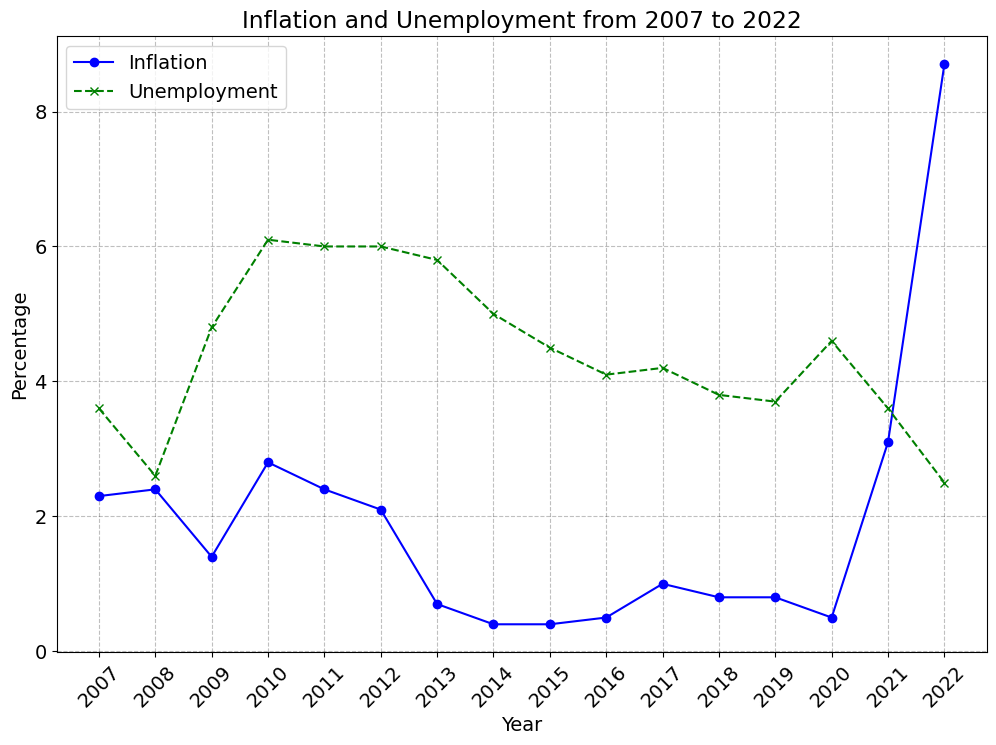

In [6]:
# Plotting the merged data
plt.figure(figsize=(12, 8))
plt.plot(merged['Year'], merged['Inflation rate'], marker='o', linestyle='-', color='blue', label='Inflation')
plt.plot(merged['Year'], merged['Unemployment'], marker='x', linestyle='--', color='green', label='Unemployment')
plt.title('Inflation and Unemployment from 2007 to 2022')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(merged['Year'].unique(), rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In Denmark from 2007 to 2022, inflation and unemployment trends mirrored broader economic conditions. Initially, moderate inflation between 2.3% and 2.8% from 2007 to 2011 coincided with stable unemployment rates, peaking slightly in 2010 at 6.1%, reflecting the global economic downturn. As inflation rates plummeted to as low as 0.4% and 0.7% between 2012 and 2015, a sluggish economic environment persisted, marked by unemployment rates stabilizing around 6%. From 2016 to 2019, both inflation and unemployment displayed steady trends; mild inflation between 0.5% and 1.0% paired with a declining unemployment rate, stabilizing around 4%, suggested a period of economic recovery. The sharp inflation increase in 2021 and 2022 to 3.1% and 8.7%, primarily driven by spikes in residential use costs, electricity, and heating, occurred alongside a substantial drop in unemployment to a record low of 2.6%, indicating a complex interplay of rapid price increases and tightening labor markets. Thus it may seem, that inflation and unemployment has an inverse relationship.

# Conclusion

This project retrieves data from Danmarks Statistik via an API. We utilize datasets like AULP01, PRIS111, and KAS301 to analyze employment and inflation statistics. First, we found the inflation rate from 2007 to 2022, where we have seen a great increase in the years 2021 and 2022. After that we compared the inflation rate with the unemployment rate. Seeing that both these variables had almost the same trend. A bar chart has also been made,, where the total unemployment rate was compared to the unemployment rate of men and women. Overall, it was seen that the unemployment for men was almost twice as much as for women. The last objective of our project was to create an interactive plot, that could show the employment of the genders across different specific fields. The conclusion was that in some fields, such as the pharmaceutical field, female employees had increased and the opposite